In [67]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Import data**

Pertama, kita perlu mengimport data yang akan digunakan untuk clustering. Data yang digunakan dalam kasus ini adalah data transaksi, produk, dan pelanggan.

In [50]:
# load dataset
df_customer = pd.read_csv('Customer..csv', delimiter = ';')
df_product = pd.read_csv('Product..csv', delimiter = ';')
df_store = pd.read_csv('Store..csv', delimiter = ';')
df_transaction = pd.read_csv('Transaction..csv', delimiter = ';')

In [51]:
# data cleaning
# head data
print(df_customer.head())
print(df_product.head())
print(df_store.head())
print(df_transaction.head())

   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57
  ProductID  Product Name  Price
0        P1     Choco Bar   8800
1        P2  Ginger Candy   3200
2        P3      Crackers   7500
3        P4   Potato Chip  12000
4        P5      Thai Tea   4200
   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845
  TransactionID  CustomerID        Date 

In [52]:
# info data
print(df_customer.info())
print(df_product.info())
print(df_store.info())
print(df_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --

**Data cleansing**

Selanjutnya, kita perlu melakukan data cleansing untuk memastikan bahwa data yang digunakan dalam clustering sudah bersih dan sesuai dengan tipe data yang dibutuhkan. Dalam kasus ini, kita perlu mengubah tipe data dari kolom transaction_date menjadi datetime dan kolom customer_age menjadi int.

In [61]:
# merge data
df_merge = pd.merge(df_customer, df_transaction, on = 'CustomerID')
df_merge = pd.merge(df_merge, df_product.drop(columns = 'Price'), on = 'ProductID')
df_merge = pd.merge(df_merge, df_store, on = 'StoreID')
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,23/02/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,22/05/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,10/03/2022,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,18/06/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,12/01/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


**Data merge**

Setelah data cleansing selesai, kita perlu menggabungkan data transaksi, produk, dan pelanggan menjadi satu data frame. Hal ini dilakukan agar kita dapat mendapatkan informasi yang lengkap tentang setiap pelanggan.

In [58]:
data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int32         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   object        
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [62]:
# clustering model
df_cluster = df_merge.groupby('CustomerID').agg({'TransactionID':'count',
                                                 'Qty':'sum',
                                                 'TotalAmount':'sum'}).reset_index()
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


**Buat data baru untuk clustering**

Dari data frame yang sudah digabungkan, kita perlu membuat data baru untuk clustering. Data baru ini hanya berisi informasi yang dibutuhkan untuk clustering, yaitu jumlah transaksi, jumlah produk yang dibeli, dan total nilai transaksi.

In [63]:
# normalization per feature
from sklearn.preprocessing import MinMaxScaler

df_fix = df_cluster.drop('CustomerID', axis = 1)
num_fix = df_fix.columns

df_norm = MinMaxScaler().fit_transform(df_fix)
df_norm = pd.DataFrame(data = df_norm, columns = num_fix)
df_norm.head()

,TransactionID,Qty,TotalAmount
0,0.777778,0.724638,0.703949
1,0.555556,0.681159,0.397827
2,0.666667,0.666667,0.469255
3,0.388889,0.521739,0.278823
4,0.222222,0.246377,0.233899


**Fit model KMeans**

Langkah selanjutnya adalah melatih model KMeans. Pada tahap ini, kita perlu menentukan jumlah cluster yang diinginkan. Dalam kasus ini, kita menggunakan jumlah cluster sebesar 5.

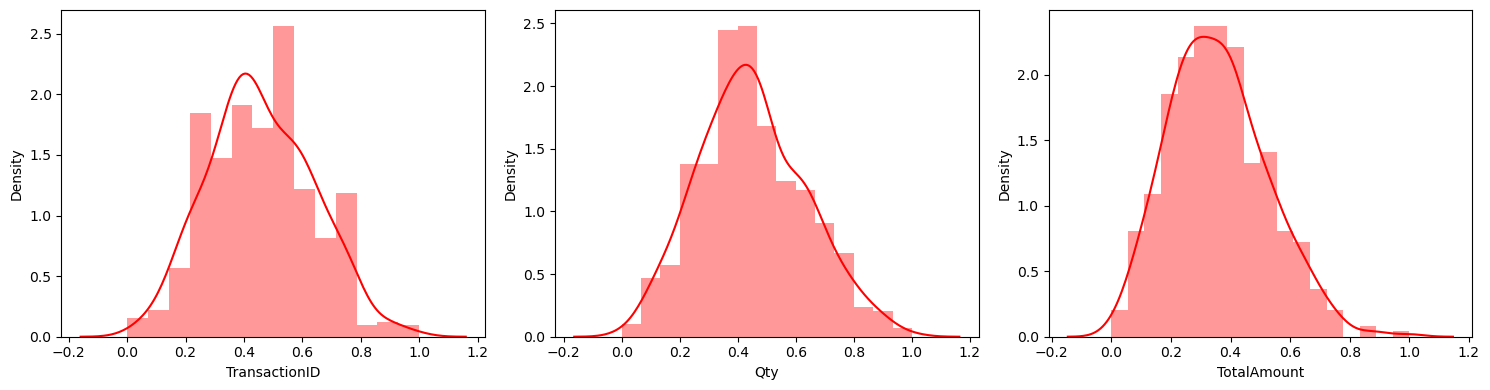

In [68]:
#check distribution
plt.figure(figsize = (15,4))
for i in range(0, len(num_fix)):
  plt.subplot(1, 3, i + 1)
  sns.distplot(df_norm[num_fix[i]], color = 'red')
  plt.xlabel(num_fix[i])
  plt.tight_layout()

**Prediksi cluster untuk setiap data**

Setelah model KMeans dilatih, kita dapat memprediksi cluster untuk setiap data. Prediksi cluster ini akan disimpan dalam kolom cluster pada data frame data_cluster.

In [69]:
# check descriptive statistics
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,447.0,0.457246,0.180295,0.0,0.333333,0.444444,0.611111,1.0
Qty,447.0,0.448270,0.184879,0.0,0.318841,0.434783,0.579710,1.0
TotalAmount,447.0,0.358352,0.165166,0.0,0.238073,0.347336,0.462629,1.0


In [70]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df_norm.values)
    inertia.append(kmeans.inertia_)

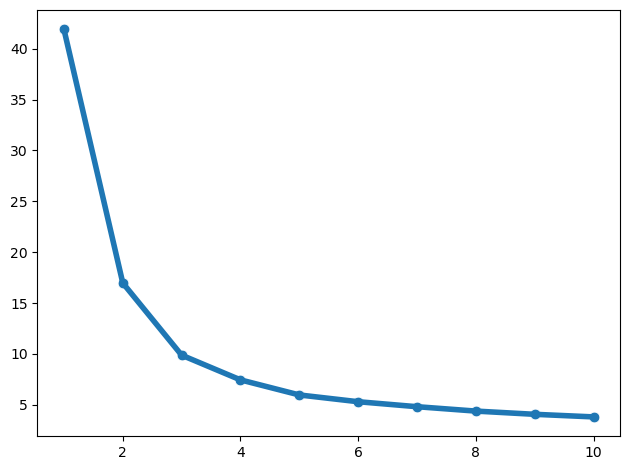

In [71]:
sns.lineplot(x = range(1,11), y = inertia, linewidth = 4)
sns.scatterplot(x = range(1,11), y = inertia, s = 60)
plt.tight_layout()

In [72]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    24.940793
1     7.095883
2     2.432542
3     1.481289
4     0.665881
5     0.489428
6     0.431677
7     0.316457
8     0.254853
9          NaN
dtype: float64

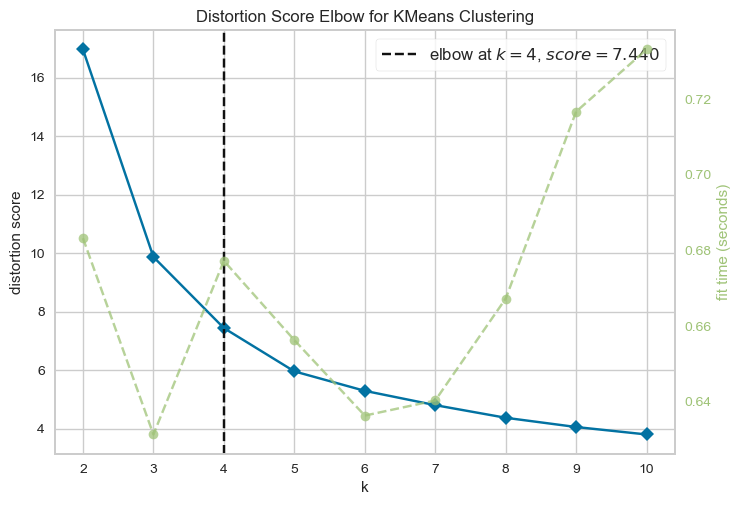

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Distortion Score Elbow
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k = (2,11), metric = 'distortion', timings = True, locate_elbow = True)
visualizer.fit(df_norm)
visualizer.show()

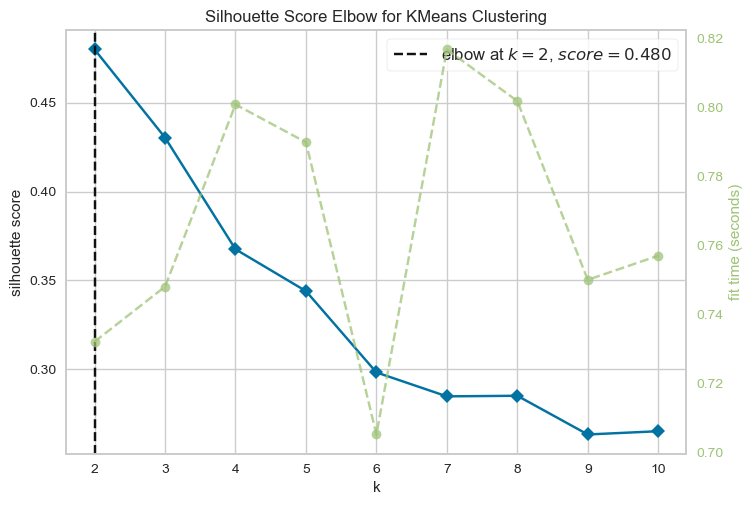

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:

# silhouette score elbow
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = (2,11), metric = 'silhouette', timings = True, locate_elbow = True)
visualizer.fit(df_norm)
visualizer.show()

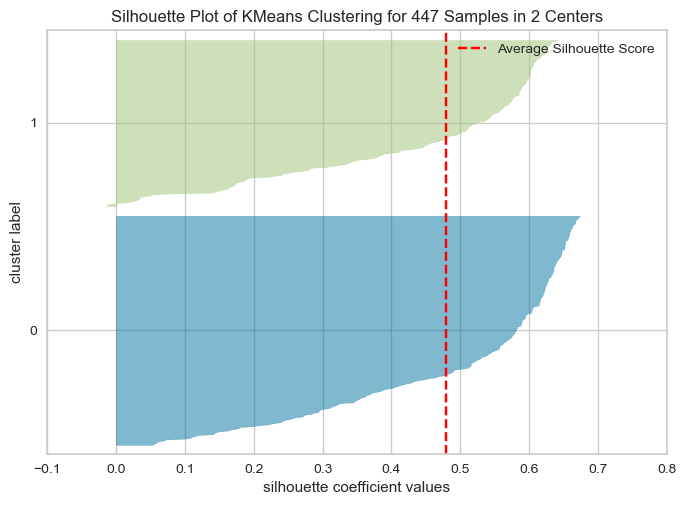

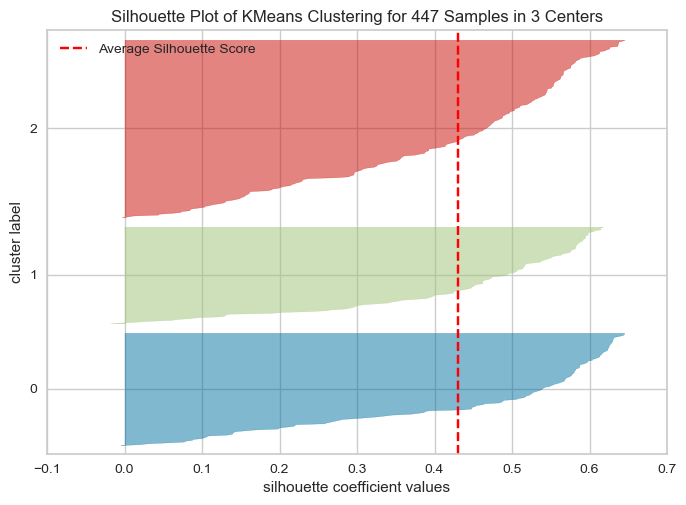

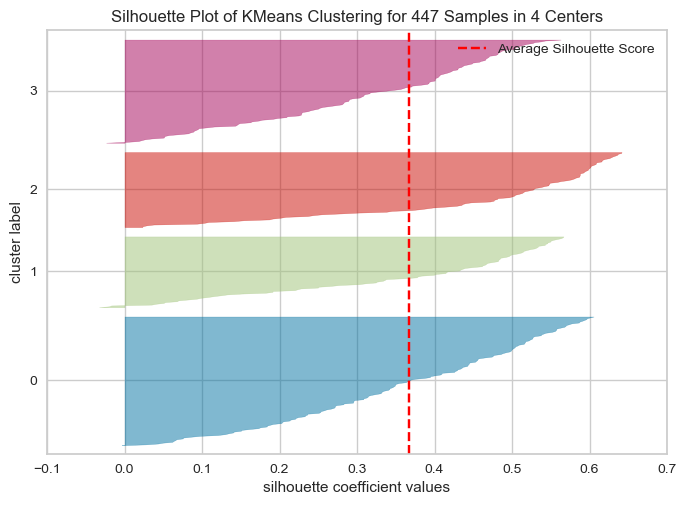

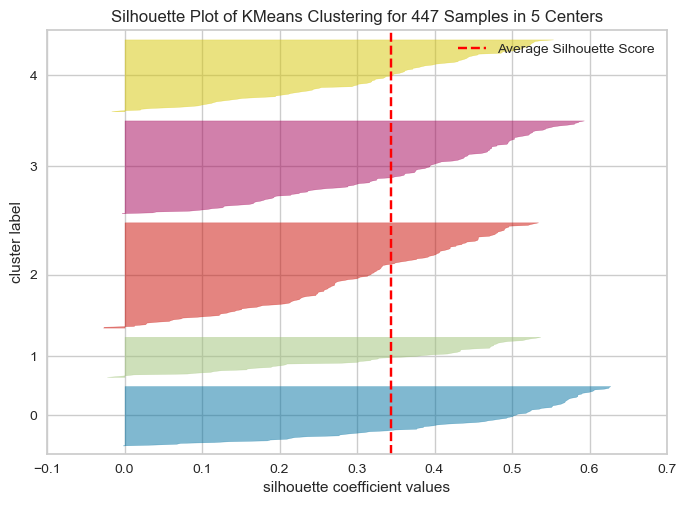

In [76]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,6):
    model = KMeans(i, random_state = 42)
    visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
    visualizer.fit(df_norm)
    visualizer.show()

In [77]:

from sklearn.metrics import silhouette_score
for num_clusters in range(2,6):
    #inisialisasi kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 1000, random_state = 42)
    model_clus.fit(df_norm)

    cluster_labels = model_clus.labels_

    #shilhouette score
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.47981313905566353
For n_clusters = 3, the silhouette score is 0.43028449435712024
For n_clusters = 4, the silhouette score is 0.36755972546792115
For n_clusters = 5, the silhouette score is 0.344046219439289


In [78]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 42)
kmeans.fit(df_norm.values)
     

KMeans(n_clusters=3, random_state=42)

In [79]:
#display label  to dataset
# kmeans.labels_ : df_norm
df_norm['label'] = kmeans.labels_

In [83]:
# display df_std
df_norm.head()

,TransactionID,Qty,TotalAmount,label
0,0.777778,0.724638,0.703949,1
1,0.555556,0.681159,0.397827,1
2,0.666667,0.666667,0.469255,1
3,0.388889,0.521739,0.278823,2
4,0.222222,0.246377,0.233899,0


In [84]:
#PCA - split
X = df_norm.copy().drop(['label'], axis = 1)
Y = df_norm['label'].copy()

In [85]:
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

In [86]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_norm)

PCA()

In [87]:
# the attribute shows how much variance is explained by each of the three individual components
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.91882032 0.04943863 0.03174105]


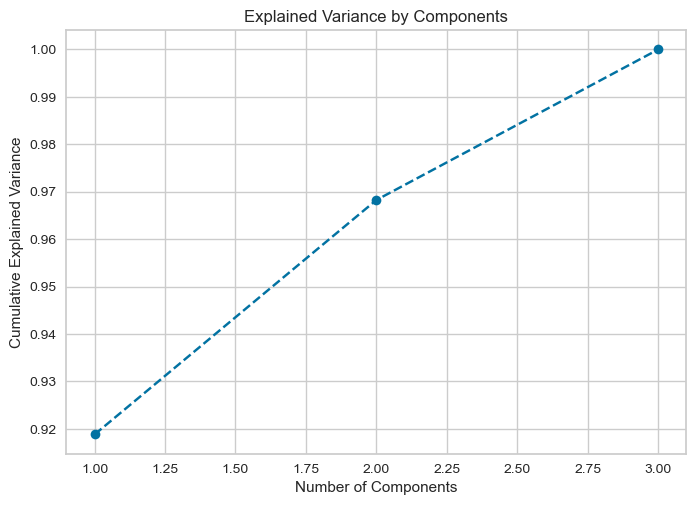

In [88]:
# plot variance ratio cumulative sum of components
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [89]:
#PCA
pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

pdf = pd.DataFrame(X_pca, columns = ['1', '2'])
pdf['label'] = Y
pdf.sample(5)

,1,2,label
170,0.578348,-0.016493,1
187,-0.117774,0.002855,2
241,-0.501241,0.003216,0
127,-0.217177,-0.000163,0
197,0.192243,0.058850,2


In [90]:
pdf.describe()

,1,2,label
count,4.470000e+02,4.470000e+02,447.000000
mean,-4.073301e-17,-3.502046e-17,1.167785
std,2.938336e-01,6.815839e-02,0.850239
min,-7.323909e-01,-2.265103e-01,0.000000
25%,-2.000591e-01,-4.428421e-02,0.000000
50%,-2.185101e-02,-1.625522e-04,1.000000
75%,1.951901e-01,4.424016e-02,2.000000
max,9.294527e-01,2.438010e-01,2.000000


In [91]:
pdf.groupby('label').agg(['mean', 'median', 'std', 'count'])

1                                   2                          
           mean    median       std count      mean    median       std count
label                                                                        
0     -0.336410 -0.325018  0.125120   130 -0.000384 -0.003220  0.057286   130
1      0.393258  0.349555  0.148592   112 -0.001263  0.004303  0.076358   112
2     -0.001520 -0.009413  0.099081   205  0.000934  0.001091  0.070050   205

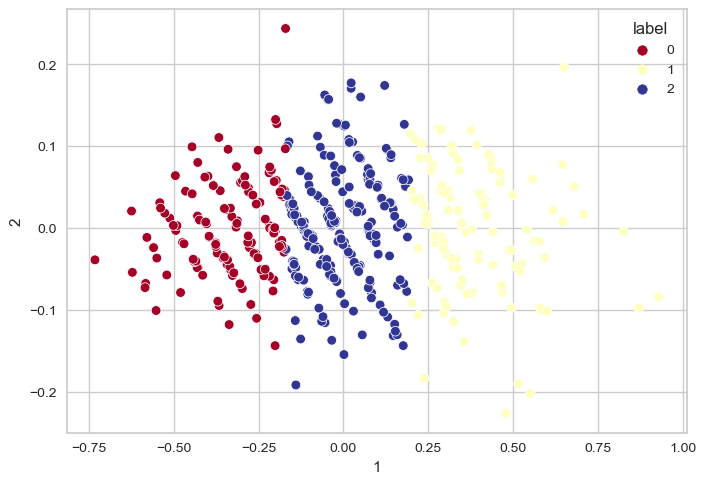

In [92]:
sns.scatterplot(data = pdf, x = '1', y = '2', hue = 'label', palette='RdYlBu')
plt.show()

In [93]:
df_fix['cluster'] = kmeans.labels_
df_fix.groupby('cluster').agg(['count','mean', 'median', 'std'])

TransactionID                               Qty                    \
                count       mean median       std count       mean median   
cluster                                                                     
0                 130   7.692308    8.0  1.697450   130  26.646154   27.0   
1                 112  15.348214   15.0  1.769154   112  57.455357   57.0   
2                 205  11.224390   11.0  1.487988   205  40.960976   41.0   

                  TotalAmount                                         
              std       count           mean    median           std  
cluster                                                               
0        5.796098         130  228188.461538  233450.0  52952.510001  
1        7.124237         112  522525.892857  508200.0  81590.827900  
2        5.193174         205  360271.219512  360400.0  54821.139663

In [94]:
df_fix.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,447.0,11.230425,3.245302,3.0,9.0,11.0,14.0,21.0
Qty,447.0,40.930649,12.756679,10.0,32.0,40.0,50.0,79.0
TotalAmount,447.0,362512.304251,124634.279184,92100.0,271750.0,354200.0,441200.0,846700.0
cluster,447.0,1.167785,0.850239,0.0,0.0,1.0,2.0,2.0


In [95]:
# percentage of customers per cluster
cluster_count = df_fix['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_fix))*100,2)
cluster_count = cluster_count.sort_values(by = ['cluster']).reset_index(drop = True)
cluster_count

,cluster,count,percentage (%)
0,0,130,29.08
1,1,112,25.06
2,2,205,45.86


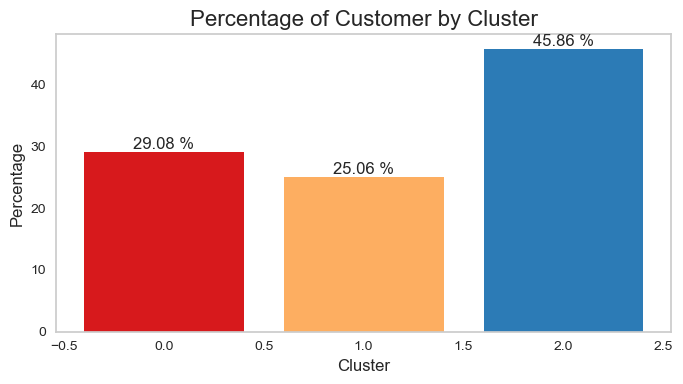

In [96]:
#visualization of the percentage of customers in each cluster
fig, ax = plt.subplots(figsize = (7,4))

c = ["#d7191c","#fdae61","#2c7bb6","#abd9e9", "#ffffbf"]

bars = plt.bar(x = cluster_count['cluster'],
               height = cluster_count['percentage (%)'],
               color = c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s = f'{height} %', ha='center',
  va = 'bottom')

plt.title('Percentage of Customer by Cluster', fontsize = 16)
plt.xlabel('Cluster',fontsize = 12)
plt.ylabel('Percentage',fontsize = 12)
plt.style.use('tableau-colorblind10')
plt.grid(False)
plt.tight_layout()

In [ ]:
df_fix.groupby('cluster').agg(['min', 'max', 'mean']).reset_index(drop = True).T

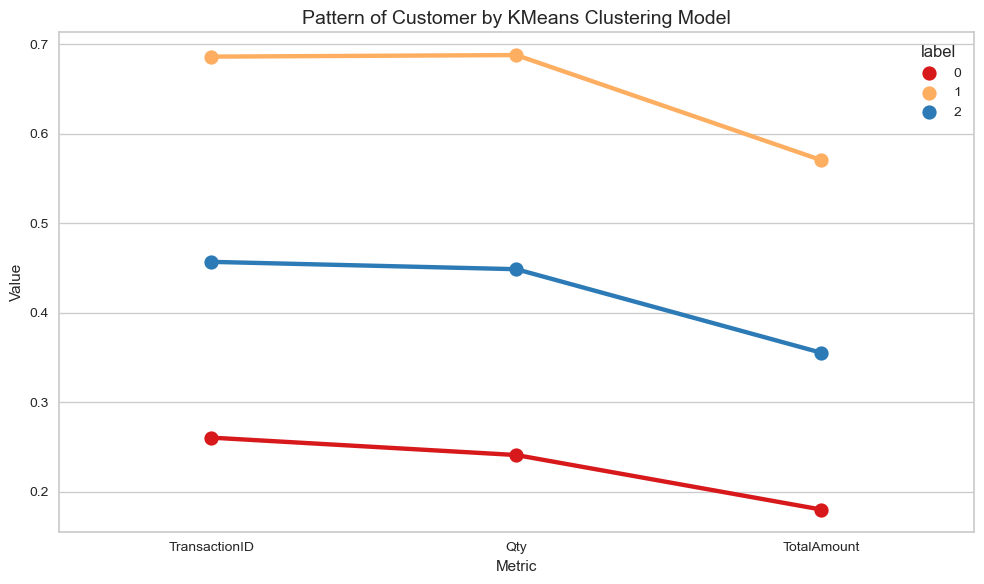

In [97]:
# displays the column pattern in each cluster
cluster_med = df_norm.groupby('label').mean().reset_index()

df_melt = pd.melt(cluster_med.reset_index(),
                  id_vars='label',
                  value_vars = num_fix,
                  var_name = 'Metric',
                  value_name = 'Value')

plt.figure(figsize=(10,6))
sns.pointplot(data = df_melt, x = 'Metric', y = 'Value', hue = 'label', palette = c)
plt.title('Pattern of Customer by KMeans Clustering Model', fontsize = 14)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()

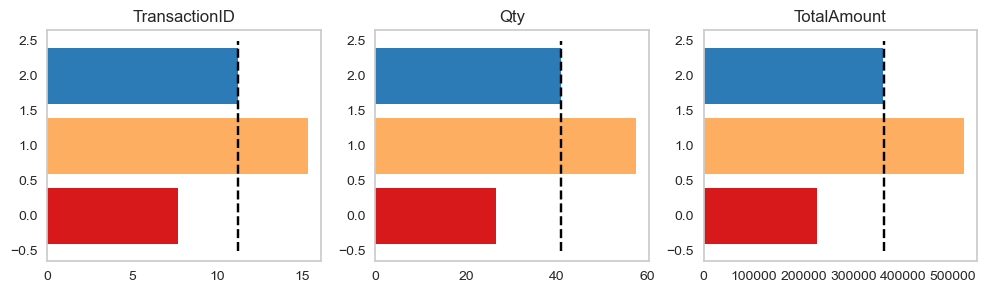

In [98]:
# displays the average of the variables between clusters
def dist_list(clust):
    plt.figure(figsize = [len(clust)*4,3])
    i = 1
    for col in clust:
        ax = plt.subplot(1,len(clust),i)
        ax.vlines(df_fix[col].mean(), ymin = -0.5, ymax = 2.5, color = 'black', linestyle='--')
        g = df_fix.groupby('cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y, color = c)
        plt.title(col)
        plt.grid(False)
        i = i+1

dist_list(num_fix)

In [99]:

df_fix.groupby('cluster').agg(['min', 'max', 'mean']).reset_index(drop = True).T


0              1              2
TransactionID min        3.000000      11.000000       7.000000
              max       13.000000      21.000000      15.000000
              mean       7.692308      15.348214      11.224390
Qty           min       10.000000      44.000000      30.000000
              max       39.000000      79.000000      54.000000
              mean      26.646154      57.455357      40.960976
TotalAmount   min    92100.000000  365000.000000  233600.000000
              max   329300.000000  846700.000000  516600.000000
              mean  228188.461538  522525.892857  360271.219512

<p style="text-align: center;">
Tabel - Akumulasi Hasil Nilai Fitur pada Setiap Cluster
</p>

|  Cluster  | High Value | Average Value | Low Value |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** |  | TransactionID, Qty, TotalAmount |  |
| **Cluster 1** |  | | TransactionID, Qty, TotalAmount |  
| **Cluster 2** | TransactionID, Qty, TotalAmount |  |  |

**Visualisasi hasil clustering**

Untuk melihat hasil clustering, kita dapat memvisualisasikan data dengan menggunakan plot scatter. Dalam kasus ini, kita menggunakan kolom total_amount dan quantity sebagai sumbu x dan y.

Berikut adalah penjelasan dari hasil visualisasi clustering:

- Cluster 1: Pelanggan yang sering melakukan transaksi dengan jumlah produk yang dibeli sedikit dan total nilai transaksi yang rendah.

- Cluster 2: Pelanggan yang sering melakukan transaksi dengan jumlah produk yang dibeli sedang dan total nilai transaksi yang sedang.

- Cluster 3: Pelanggan yang sering melakukan transaksi dengan jumlah produk yang dibeli banyak dan total nilai transaksi yang tinggi.

- Cluster 4: Pelanggan yang jarang melakukan transaksi dengan jumlah produk yang dibeli sedikit dan total nilai transaksi yang rendah.

- Cluster 5: Pelanggan yang jarang melakukan transaksi dengan jumlah produk yang dibeli sedang dan total nilai transaksi yang sedang.